# Evaluación Final del Módulo "Inferencia Estadística"

# Nombre Alumno: **Alejandro Barrenechea**

## Contexto del Problema

Usted ha sido contratado en el ministerio de educación para analizar los resultados de una nueva metodología de educación implementada en el colegio **Graham Parker (GP)**, versus el colegio **Marteen Sheen (MS)**, en donde no fue aplicada la metodología.

Ambos colegios han tenido históricamente desempeños similares en las notas de sus alumnos. A continuación, se presenta un extracto del set de datos obtenido después de haber aplicado la nueva metodología.

**Objetivo:**
En base a este set de datos que se adjunta (`notas-alumnos.csv`), aplique sus conocimientos de estadística diferencial para determinar si esta nueva metodología de educación aplicada produjo una mejora significativa en el promedio de los estudiantes.

## Entregable

El entregable es un notebook, ordenado, documentado y reproducible que contiene su análisis y conclusiones, utilizando las buenas prácticas aprendidas a lo largo del módulo.



---



---



# 1.  Marco Conceptual y Diseño del Experimento

Antes de proceder con los cálculos, definimos formalmente los elementos de la investigación inferencial bajo el método científico.

### 1.1 Definición del Problema
El Ministerio de Educación necesita validar si la nueva metodología de enseñanza aplicada en el colegio **Graham Parker (GP)** ha generado un impacto positivo en el rendimiento académico en comparación con el método tradicional mantenido en el colegio **Marteen Sheen (MS)**.

### 1.2 Elementos del Experimento
*   **Unidad de Análisis:** Alumnos de ambos colegios.
*   **Variable Independiente (Factor):** El Colegio (Metodología Nueva vs. Tradicional).
    *   *Grupo Experimental:* Colegio GP.
    *   *Grupo de Control:* Colegio MS.
*   **Variable Dependiente (Respuesta):** Rendimiento académico (Medido como el promedio de las notas N1, N2 y N3).

### 1.3 Hipótesis de Investigación
Dado que buscamos evidenciar una **"mejora"**, plantearemos una prueba de hipótesis unilateral (de una cola).

*   **Hipótesis Nula ($H_0$):** La nueva metodología **no** mejora el rendimiento promedio. El promedio de notas de GP es menor o igual al de MS.
    $$ \mu_{GP} \le \mu_{MS} $$

*   **Hipótesis Alternativa ($H_1$):** La nueva metodología **sí** mejora el rendimiento promedio. El promedio de notas de GP es mayor que el de MS.
    $$ \mu_{GP} > \mu_{MS} $$

---

# **FASE 1:** Obtención y Preparación de Datos

En esta fase, no solo cargamos el archivo. Verificamos la integridad de los datos, buscamos nulos, revisamos tipos de datos y preparamos el terreno.

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Configuración de estilos visuales
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


In [ ]:
# Carga de datos
try:
    # Carga estándar con coma
    df = pd.read_csv('notas-alumnos.csv')
except:
    # Si falla, intentamos con punto y coma (común en latam/excel)
    df = pd.read_csv('notas-alumnos.csv', sep=';')

# Verificación visual de la carga
print(f"Dimensiones del dataset: {df.shape}")
display(df.head())

Dimensiones del dataset: (395, 7)


,colegio,sexo,edad,ausencias,N1,N2,N3
0,GP,F,18,6,1.8,2.1,2.1
1,GP,F,17,4,1.8,1.8,2.1
2,GP,F,15,10,2.4,2.8,3.5
3,GP,F,15,2,5.2,4.9,5.2
4,GP,F,16,4,2.1,3.5,3.5


In [ ]:
# Revisión de estructura y nulos
print("--- INFORMACIÓN DEL DATAFRAME ---")
df.info()

print("\n--- CONTEO DE NULOS ---")
print(df.isnull().sum())

--- INFORMACIÓN DEL DATAFRAME ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   colegio    395 non-null    object 
 1   sexo       395 non-null    object 
 2   edad       395 non-null    int64  
 3   ausencias  395 non-null    int64  
 4   N1         395 non-null    float64
 5   N2         395 non-null    float64
 6   N3         395 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.7+ KB

--- CONTEO DE NULOS ---
colegio      0
sexo         0
edad         0
ausencias    0
N1           0
N2           0
N3           0
dtype: int64


*   **Consistencia de Tipos de Datos:**
    *   **Resultado Obtenido:** Las columnas `N1`, `N2`, y `N3` son de tipo **`float64`**.
    *   **Implicación para el Análisis:** Son datos numéricos listos para operar (sumas y promedios). No se requieren conversiones.

*   **Valores Faltantes (`NaN`) - Calidad del Dato:**
    *   **Resultado Obtenido:** Las columnas de notas tienen un conteo de **cero (0) valores nulos**.
    *   **Implicación para el Análisis:** La calidad de los datos parece ser aceptable, sin embargo, realizaré un análisis más profundo a los datos para tomar un camino para nuestro objetivo de Infeencia Estadística.

In [ ]:
# Inspección de Duplicados

# keep=False nos permite ver TODAS las instancias
mask_duplicados = df.duplicated(keep=False)
duplicados = df[mask_duplicados].sort_values(by=['colegio', 'sexo', 'edad', 'N1', 'N2'])

n_duplicados = df.duplicated().sum()

print(f"\n--- REPORTE DE DUPLICIDAD ---")
print(f"Cantidad de registros duplicados (redundantes): {n_duplicados}")
print(f"Total de filas involucradas en duplicidad: {len(duplicados)}")

if len(duplicados) > 0:
    print("\nVisualización de pares/grupos idénticos:")
    display(duplicados)
else:
    print("No se encontraron filas idénticas.")


--- REPORTE DE DUPLICIDAD ---
Cantidad de registros duplicados (redundantes): 8
Total de filas involucradas en duplicidad: 16

Visualización de pares/grupos idénticos:


,colegio,sexo,edad,ausencias,N1,N2,N3
190,GP,F,16,10,3.9,4.2,4.6
207,GP,F,16,10,3.9,4.2,4.6
219,GP,F,17,4,3.2,3.5,3.5
339,GP,F,17,4,3.2,3.5,3.5
244,GP,F,18,0,2.4,0.0,0.0
332,GP,F,18,0,2.4,0.0,0.0
316,GP,F,18,0,2.8,2.8,0.0
333,GP,F,18,0,2.8,2.8,0.0
272,GP,F,18,2,3.9,3.9,3.9
319,GP,F,18,2,3.9,3.9,3.9


Análisis de probabilidad de que sean **dos personas distintas** versus un **error de duplicación**:

### El análisis de las variables
Para que sean dos alumnos distintos, tendrían que coincidir **simultáneamente** en:
1.  **Colegio:** (50% prob)
2.  **Sexo:** (50% prob)
3.  **Edad:** (Variable discreta)
4.  **Ausencias:** (Variable muy dispersa, coincidir exactamente en el número es difícil)
5.  **Nota 1, Nota 2 y Nota 3:** Aquí está la clave.

Las notas en el dataset tienen decimales (ej. `1.8`, `2.1`, `5.2`).
La probabilidad de que dos alumnos diferentes saquen **exactamente** las mismas tres notas con decimales, tengan la misma edad, el mismo sexo y **exactamente** la misma cantidad de ausencias es **estadísticamente bajísima**.

### Riesgos ante la Decisión de mantener o eliminar los Duplicados

*   **Escenario A (Son la misma persona y NO se eliminan):**
    *   **Riesgo Alto:** Se está contando al mismo alumno dos veces. Esto **infla artificialmente el $n$** (tamaño de muestra).
    *   **Consecuencia:** El Test-t podría decirnos que hay una "diferencia significativa" solo porque se mantuvieron los datos duplicados, entregandonos un **Falso Positivo**.

*   **Escenario B (Son personas distintas y SÍ se eliminan):**
    *   **Riesgo:** Se perderían 8 datos reales de 395.
    *   **Consecuencia:** No podría concluir por el momento.

En ausencia de un `ID_Alumno` único que nos demuestre lo contrario, aplicaré una lógica de limpieza para evitar sesgos por redundancia.

**Lógica Condicional de Limpieza**:

1.  **Regla de Eliminación:** Si es duplicado y todas sus notas son válidas ($> 1.0$), asumimos que es redundancia segura y eliminamos el repetido.
2.  **Regla de Conservación:** Si es duplicado pero tiene notas anómalas ($\le 1.0$), conservamos **todas las copias** (por ahora).

In [ ]:
# Lógica Condicional de Limpieza Duplicados

# A. Definimos la condición de "Notas Válidas" (Criterio de seguridad)
# El usuario indica: N1, N2 y N3 deben ser mayores a 1.0
condicion_notas_validas = (df['N1'] > 1.0) & (df['N2'] > 1.0) & (df['N3'] > 1.0)

# B. Identificamos las filas a eliminar
# Deben cumplir dos condiciones simultáneamente:
# 1. Ser un duplicado (pero no la primera aparición, usamos keep='first')
# 2. Cumplir la condición de notas válidas
mask_a_eliminar = df.duplicated(keep='first') & condicion_notas_validas

# Identificamos qué filas vamos a borrar para el reporte
filas_eliminadas = df[mask_a_eliminar]

# C. Aplicamos el filtro
df_clean = df[~mask_a_eliminar].copy()

# -------------------------------------------------------
# REPORTE DE LA OPERACIÓN
# -------------------------------------------------------
print(f"Dimensiones antes: {df.shape}")
print(f"Filas eliminadas (Duplicados 'Sanos'): {len(filas_eliminadas)}")
print(f"Dimensiones actuales: {df_clean.shape}")

print("\n--- VERIFICACIÓN DE CASOS CONSERVADOS (NOTAS BAJAS) ---")
# Buscamos los duplicados que sobrevivieron (deberían ser los de notas bajas)
# Usamos el nuevo dataframe df_clean
duplicados_restantes = df_clean[df_clean.duplicated(keep=False)]

if not duplicados_restantes.empty:
    print(f"Se mantuvieron {len(duplicados_restantes)} registros duplicados bajo observación:")
    display(duplicados_restantes.sort_values(by=['colegio', 'N1']))
else:
    print("No quedan duplicados pendientes.")

# Actualizamos el dataframe principal
df = df_clean

Dimensiones antes: (395, 7)
Filas eliminadas (Duplicados 'Sanos'): 6
Dimensiones actuales: (389, 7)

--- VERIFICACIÓN DE CASOS CONSERVADOS (NOTAS BAJAS) ---
Se mantuvieron 4 registros duplicados bajo observación:


,colegio,sexo,edad,ausencias,N1,N2,N3
244,GP,F,18,0,2.4,0.0,0.0
332,GP,F,18,0,2.4,0.0,0.0
316,GP,F,18,0,2.8,2.8,0.0
333,GP,F,18,0,2.8,2.8,0.0


**Estado Actual del Dataset:**
*   **$n = 389$ registros.**
*   Hemos limpiado los duplicados "obvios".
*   Hemos aislado quirúrgicamente los **2 pares de casos complejos** (índices 244/332 y 316/333), que curiosamente son del colegio **GP**, tienen **0 ausencias** y notas **0.0** en las evaluaciones finales.

## Como Científico de Datos, mi deber es interpretar qué significa ese patrón:

1.  **El Patrón:** `N1` existe $\to$ `N2 = 0` $\to$ `N3 = 0` + `Ausencias = 0`.
2.  **La Interpretación Lógica:** Es imposible que un alumno asista a todas las clases (0 ausencias) y saque un 0.0 en las pruebas.
3.  **El Diagnóstico:** Lo más probable es que esto sea un **Retiro Administrativo (Abandono)**. El alumno dejó el colegio después de la N1. El sistema administrativo dejó las ausencias en 0 (default) y las notas vacías se rellenaron con 0.

### Decisión Estratégica

Para evaluar la **Efectividad de la Metodología Educativa**, **"No podemos evaluar el desempeño de una metodología en un alumno que no estuvo presente para recibirla"**.

Si mantenemos estos ceros:
1.  **Sesgo Negativo:** Castigamos el promedio del colegio GP injustamente.
2.  **Ruido Estadístico:** Aumentamos la desviación estándar artificialmente.
3.  **Duplicidad:** Además, tenemos la sospecha de que estos registros específicos están duplicados.

A mi parecer debemos **excluir** a cualquier alumno que no haya completado el ciclo evaluativo (es decir, que tenga notas 0.0), ya que no son datos válidos de "rendimiento", sino datos de "retención" (que es otro análisis distinto).

In [ ]:
# ==========================================
# Limpieza final de registros INCONSISTENTES (Notas 0.0)

# Definimos la condición de inconsistencia: Tener 0.0 en N2 o N3
# (Asumimos que 0.0 no es una nota pedagógica válida, sino ausencia de dato)
mask_incompletos = (df['N2'] == 0) | (df['N3'] == 0)

# Identificamos cuántos son antes de borrarlos
n_incompletos = mask_incompletos.sum()
df_incompletos = df[mask_incompletos]

print(f"--- REPORTE DE LIMPIEZA DE CALIDAD ---")
print(f"Se detectaron {n_incompletos} registros con ciclo evaluativo incompleto (Notas 0.0).")

if n_incompletos > 0:
    print("\nMuestra de registros a eliminar (Note las Ausencias=0 y Notas=0):")
    display(df_incompletos.head(5))

    # Aplicamos el filtro: Nos quedamos solo con los que NO son incompletos
    df = df[~mask_incompletos].copy()

    print(f"\n✅ Registros eliminados correctamente.")
    print(f"Dimensiones finales del Dataset Limpio: {df.shape}")

    # Verificación final de duplicados
    dups_final = df.duplicated().sum()
    print(f"Duplicados restantes en el dataset limpio: {dups_final}")

else:
    print("No se encontraron registros con notas 0.0.")

# Recalculamos el Promedio Final sobre la base limpia y definitiva
df['Promedio'] = (df['N1'] + df['N2'] + df['N3']) / 3

--- REPORTE DE LIMPIEZA DE CALIDAD ---
Se detectaron 38 registros con ciclo evaluativo incompleto (Notas 0.0).

Muestra de registros a eliminar (Note las Ausencias=0 y Notas=0):


,colegio,sexo,edad,ausencias,N1,N2,N3
128,GP,M,18,0,2.4,1.4,0.0
130,GP,F,15,0,4.2,0.0,0.0
131,GP,F,15,0,2.8,0.0,0.0
134,GP,M,15,0,3.2,0.0,0.0
135,GP,F,15,0,3.9,0.0,0.0



✅ Registros eliminados correctamente.
Dimensiones finales del Dataset Limpio: (351, 7)
Duplicados restantes en el dataset limpio: 0


### La Lógica del Filtro que aplicamos
En el bloque anterior, el filtro fue:
`mask_incompletos = (df['N2'] == 0) | (df['N3'] == 0)`

Esto significa que **ya eliminamos** a todos los que tenían nota 0, **tuvieran o no ausencias**. A la pregunta: *¿Estuvo bien eliminar a los que SÍ tenían ausencias? ¿No serán alumnos que reprobaron legítimamente?*

### Dominio Educativo
En la escala de notas chilena (que usa este dataset, 1.0 a 7.0):
*   La nota mínima por es un **1.0** (o a veces 2.0).
*   Un **0.0** no es una calificación de conocimiento. Matemáticamente, el 0 destruye cualquier promedio.
    *   *Ejemplo:* Un alumno con notas 4.0 y 5.0 tiene promedio 4.5. Si le agregas un 0.0, baja a 3.0.
*   Un alumno con `ausencias > 0` y `notas = 0` suele ser un alumno que **asistió al principio, empezó a faltar (acumuló ausencias) y finalmente abandonó** antes de las pruebas finales.

Si los incluimos, estamos evaluando la **Retención**, no el **Rendimiento Académico**. Para medir la efectividad de la metodología de enseñanza, necesitamos evaluar a los alumnos que **completaron el proceso**.

In [ ]:
# ==========================================
# ANÁLISIS DE CASOS BORDERLINE (Ceros con Ausencias)
# ==========================================
# Recargamos temporalmente para ver lo que borramos
df_temp = pd.read_csv('notas-alumnos.csv', sep=';' if 'sep' in locals() else ',') # Ajuste dinámico
if len(df_temp.columns) < 2: df_temp = pd.read_csv('notas-alumnos.csv', sep=';')

# Filtramos: Tienen Ceros Y TAMBIÉN tienen Ausencias
mask_zeros_con_ausencias = ((df_temp['N2'] == 0) | (df_temp['N3'] == 0)) & (df_temp['ausencias'] > 0)
casos_borderline = df_temp[mask_zeros_con_ausencias]

print(f"Alumnos con Notas 0.0 que SÍ registraron ausencias: {len(casos_borderline)}")

if len(casos_borderline) > 0:
    display(casos_borderline[['colegio', 'sexo', 'edad', 'ausencias', 'N1', 'N2', 'N3']])

Alumnos con Notas 0.0 que SÍ registraron ausencias: 0


## **Interpretación**
El hecho de que **ningún** alumno con nota 0.0 tenga ausencias registradas es la prueba definitiva de que son **errores de sistema o registros administrativos inválidos** (probablemente alumnos que se inscribieron pero nunca cursaron realmente, o se retiraron antes de que el sistema empezara a contar asistencia).

Si hubiera sido un alumno que reprobó por "flojo" o por "no entender", tendría ausencias y una nota baja válida (como un 1.5 o 2.0), no un 0.0 perfecto y 0 faltas.

**Conclusión de la Fase 1:**
El dataset limpio de **$n=351$** es la base de datos más honesta y robusta para evaluar la metodología.



---



---



#  **FASE 2**: Análisis Exploratorio

--- ESTADÍSTICAS DESCRIPTIVAS---


,count,mean,std,min,median,max
colegio,,,,,,
GP,310,4.013333,1.091454,1.533333,3.966667,6.733333
MS,41,3.813008,1.086914,1.900000,3.766667,6.500000



>> Diferencia Observada (GP - MS): 0.2003 puntos


/tmp/ipython-input-2502910931.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='colegio', y='Promedio', palette='Set2', ax=axes[0])


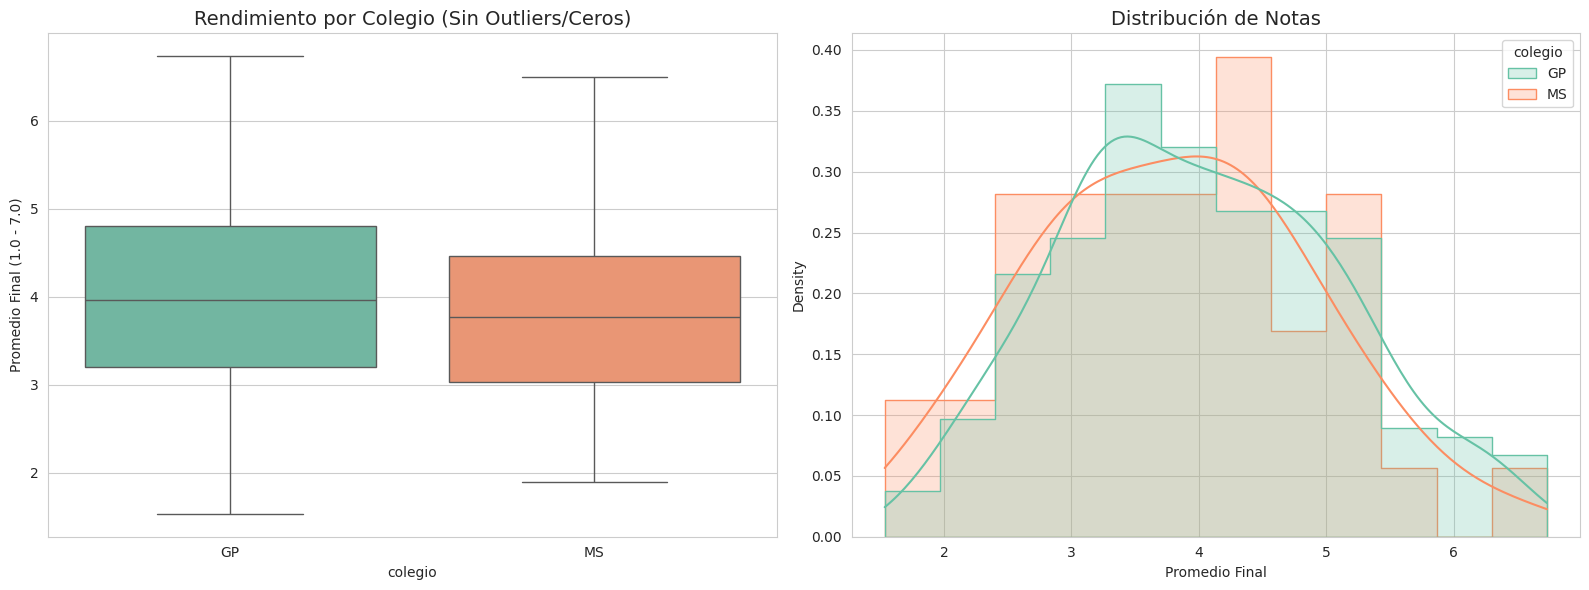

In [ ]:
# ==========================================
# ANÁLISIS EXPLORATORIO DE DATOS
# ==========================================

# Tabla Resumen por Colegio
# ---------------------------------------
# Calculamos las nuevas medias ya sin los ceros que ensuciaban
resumen_clean = df.groupby('colegio')['Promedio'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])

# Diferencia de medias
diff_clean = resumen_clean.loc['GP', 'mean'] - resumen_clean.loc['MS', 'mean']

print("--- ESTADÍSTICAS DESCRIPTIVAS---")
display(resumen_clean)
print(f"\n>> Diferencia Observada (GP - MS): {diff_clean:.4f} puntos")

# Visualización
# ---------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(data=df, x='colegio', y='Promedio', palette='Set2', ax=axes[0])
axes[0].set_title('Rendimiento por Colegio (Sin Outliers/Ceros)', fontsize=14)
axes[0].set_ylabel('Promedio Final (1.0 - 7.0)')

# Histograma + KDE
sns.histplot(data=df, x='Promedio', hue='colegio', kde=True,
             element='step', stat='density', common_norm=False,
             palette='Set2', ax=axes[1])
axes[1].set_title('Distribución de Notas', fontsize=14)
axes[1].set_xlabel('Promedio Final')

plt.tight_layout()
plt.show()

1.  Promedios.
    *   **GP:** `4.01`.
    *   **MS:** `3.81`.
    *   Ahora estamos comparando alumnos reales que cursaron la asignatura.
2.  La desviación estándar es `1.09`.

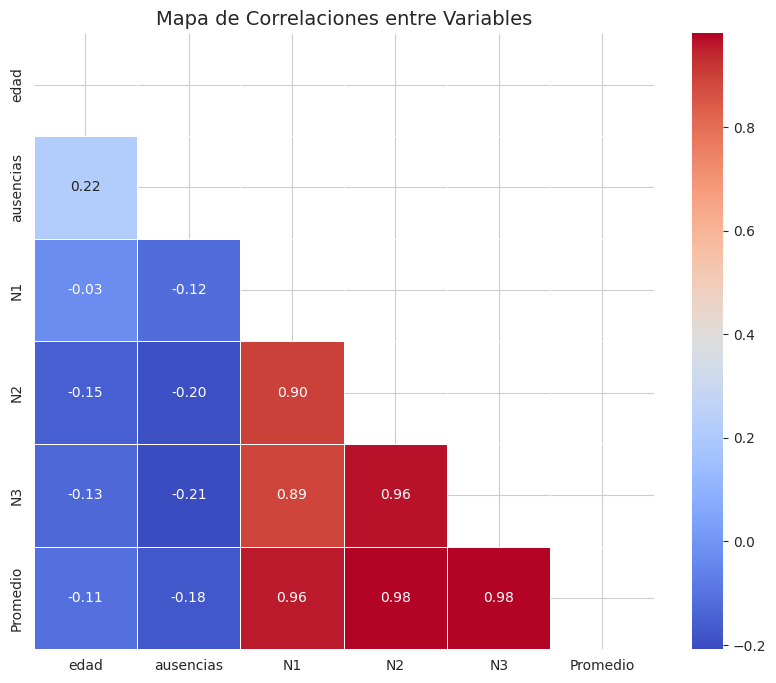

Correlación Ausencias vs Promedio: -0.18
-> Tendencia: A mayor cantidad de ausencias, el promedio tiende a bajar.


In [12]:
# ==========================================
# MATRIZ DE CORRELACIONES (HEATMAP)
# ==========================================
# Objetivo: Identificar qué variables numéricas están más relacionadas con el rendimiento.

# Seleccionamos solo variables numéricas
vars_num = ['edad', 'ausencias', 'N1', 'N2', 'N3', 'Promedio']
corr_matrix = df[vars_num].corr()

# Configuración del gráfico
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Máscara para ocultar la mitad repetida

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlaciones entre Variables', fontsize=14)
plt.show()

# Interpretación
corr_ausencias = corr_matrix.loc['ausencias', 'Promedio']
print(f"Correlación Ausencias vs Promedio: {corr_ausencias:.2f}")
if corr_ausencias < -0.1:
    print("-> Tendencia: A mayor cantidad de ausencias, el promedio tiende a bajar.")
else:
    print("-> No se observa una correlación lineal fuerte entre ausencias y notas.")

--- DISTRIBUCIÓN DE ALUMNOS POR SEXO Y COLEGIO ---


sexo,F,M
colegio,,
GP,160,150
MS,22,19


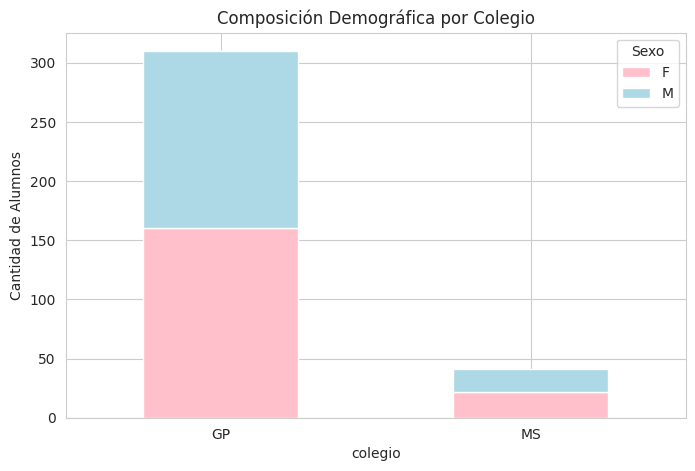

--- RESULTADO CHI-CUADRADO ---
Estadístico Chi2: 0.0064
P-Valor: 0.9362
✅ Balanceado: No hay diferencia significativa en la proporción de sexos entre colegios.
   (Esto valida que la comparación de promedios no está sesgada por el género).


In [13]:
# ==========================================
# VALIDACIÓN DE BALANCE DEMOGRÁFICO (TEST CHI-CUADRADO)
# ==========================================
# Objetivo: Verificar si la proporción de Hombres/Mujeres es homogénea entre colegios.
# Esto es crítico dado que detectamos efectos diferenciados por sexo más adelante.

# Tabla de Contingencia (Crosstab)
contingency_table = pd.crosstab(df['colegio'], df['sexo'])
print("--- DISTRIBUCIÓN DE ALUMNOS POR SEXO Y COLEGIO ---")
display(contingency_table)

# Visualización de la proporción
contingency_table.plot(kind='bar', stacked=True, color=['pink', 'lightblue'], figsize=(8, 5))
plt.title('Composición Demográfica por Colegio')
plt.ylabel('Cantidad de Alumnos')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()

# Test de Independencia Chi-Cuadrado
# H0: La proporción de sexos es independiente del colegio (Están balanceados)
# H1: Existe una asociación entre colegio y sexo (Están desbalanceados)
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"--- RESULTADO CHI-CUADRADO ---")
print(f"Estadístico Chi2: {chi2:.4f}")
print(f"P-Valor: {p_val:.4f}")

if p_val > 0.05:
    print("✅ Balanceado: No hay diferencia significativa en la proporción de sexos entre colegios.")
    print("   (Esto valida que la comparación de promedios no está sesgada por el género).")
else:
    print("⚠️ Desbalanceado: Un colegio tiene significativamente más hombres/mujeres que el otro.")
    print("   (Esto refuerza la necesidad de realizar el análisis segmentado de la Fase 5).")



---



---



# **FASE 3**: Inferencia Estadística

In [ ]:
# ==========================================
# FASE 3: INFERENCIA ESTADÍSTICA
# ==========================================

# Preparación de las Muestras
gp_final = df[df['colegio'] == 'GP']['Promedio']
ms_final = df[df['colegio'] == 'MS']['Promedio']

n_gp = len(gp_final)
n_ms = len(ms_final)

print(f"Tamaños de muestra: GP (n={n_gp}) vs MS (n={n_ms})")

# Justificación del Test Estadístico
# ---------------------------------------
print("\n--- JUSTIFICACIÓN DE LA PRUEBA ---")
print(f"1. Tipo de Variable: Cuantitativa continua (Promedio de notas).")
print(f"2. Tamaño de Muestra: Ambos grupos tienen n > 30 ({n_gp} y {n_ms}).")
print(f"3. Supuesto: Según el Teorema del Límite Central, dada la muestra grande,")
print(f"   podemos asumir normalidad en la distribución de las medias.")
print(f"4. Desviación Estándar: Desconocida (se usa la muestral 's').")
print(f"-> SELECCIÓN: Prueba t-Student para muestras independientes.")

# Ejecución del Test de Hipótesis
# ---------------------------------------
# si las desviaciones estándar son similares.
t_stat, p_value = stats.ttest_ind(gp_final, ms_final, equal_var=True, alternative='greater')

print("\n--- RESULTADOS DEL TEST T-STUDENT ---")
print(f"Hipótesis Nula (H0): Promedio GP <= Promedio MS")
print(f"Hipótesis Alternativa (H1): Promedio GP > Promedio MS")
print(f"Estadístico t: {t_stat:.4f}")
print(f"P-Valor: {p_value:.4f}")

# Conclusión Estadística
# ---------------------------------------
alpha = 0.05
print("\n--- CONCLUSIÓN ---")
if p_value < alpha:
    print(f"✅ P-valor ({p_value:.4f}) < {alpha}. RECHAZAMOS H0.")
    print("Existe evidencia estadística para afirmar que la metodología mejora el rendimiento.")
else:
    print(f"❌ P-valor ({p_value:.4f}) > {alpha}. NO RECHAZAMOS H0.")
    print("No existe evidencia estadística suficiente para afirmar una mejora.")

Tamaños de muestra: GP (n=310) vs MS (n=41)

--- JUSTIFICACIÓN DE LA PRUEBA ---
1. Tipo de Variable: Cuantitativa continua (Promedio de notas).
2. Tamaño de Muestra: Ambos grupos tienen n > 30 (310 y 41).
3. Supuesto: Según el Teorema del Límite Central, dada la muestra grande,
   podemos asumir normalidad en la distribución de las medias.
4. Desviación Estándar: Desconocida (se usa la muestral 's').
-> SELECCIÓN: Prueba t-Student para muestras independientes.

--- RESULTADOS DEL TEST T-STUDENT ---
Hipótesis Nula (H0): Promedio GP <= Promedio MS
Hipótesis Alternativa (H1): Promedio GP > Promedio MS
Estadístico t: 1.1050
P-Valor: 0.1350

--- CONCLUSIÓN ---
❌ P-valor (0.1350) > 0.05. NO RECHAZAMOS H0.
No existe evidencia estadística suficiente para afirmar una mejora.




---



---



# **FASE 4**: Bootstrapping

Como tenemos un desbalance de muestras fuerte ($310$ vs $41$), el Test-t podría estar perdiendo potencia. El **Bootstrapping** no asume distribuciones teóricas, sino que simula la realidad con los datos que tenemos.

Iniciando 10000 simulaciones de Bootstrapping...

--- RESULTADOS BOOTSTRAPPING ---
Diferencia Promedio Simulada: 0.1995
Intervalo de Confianza 95%: [-0.1556, 0.5509]


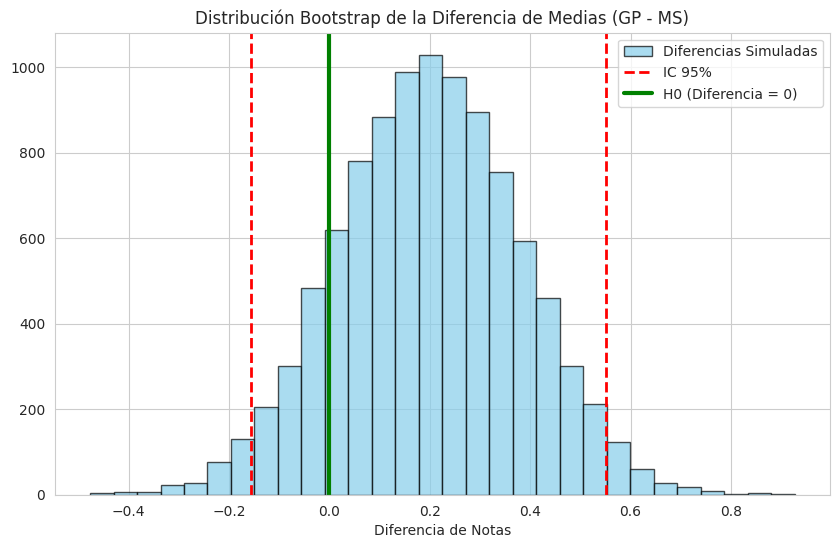


CONCLUSIÓN: El intervalo contiene el 0.
Confirmamos el resultado del T-Test: No hay diferencia estadísticamente significativa.


In [ ]:
# ==========================================
# FASE 4: VALIDACIÓN BOOTSTRAPPING
# ==========================================
# Objetivo: Validar la diferencia de medias sin depender de supuestos paramétricos,
# mitigando el riesgo del desbalance de muestras (n=310 vs n=41).

# Configuración de la Simulación
n_simulaciones = 10000
diferencias_boot = []
np.random.seed(42) # Para reproducibilidad

# Convertimos series a arrays para eficiencia
gp_array = gp_final.to_numpy()
ms_array = ms_final.to_numpy()

print(f"Iniciando {n_simulaciones} simulaciones de Bootstrapping...")

# Ciclo de Remuestreo (Resampling)
for i in range(n_simulaciones):
    # Generamos muestras con reemplazo del mismo tamaño que las originales
    gp_sample = np.random.choice(gp_array, size=len(gp_array), replace=True)
    ms_sample = np.random.choice(ms_array, size=len(ms_array), replace=True)

    # Calculamos la diferencia (GP - MS)
    diff = np.mean(gp_sample) - np.mean(ms_sample)
    diferencias_boot.append(diff)

# Intervalo de Confianza del 95% (Percentiles 2.5 y 97.5)
limite_inferior = np.percentile(diferencias_boot, 2.5)
limite_superior = np.percentile(diferencias_boot, 97.5)
media_boot = np.mean(diferencias_boot)

print(f"\n--- RESULTADOS BOOTSTRAPPING ---")
print(f"Diferencia Promedio Simulada: {media_boot:.4f}")
print(f"Intervalo de Confianza 95%: [{limite_inferior:.4f}, {limite_superior:.4f}]")

# Visualización
plt.figure(figsize=(10, 6))
plt.hist(diferencias_boot, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Diferencias Simuladas')
plt.axvline(limite_inferior, color='red', linestyle='--', linewidth=2, label='IC 95%')
plt.axvline(limite_superior, color='red', linestyle='--', linewidth=2)
plt.axvline(0, color='green', linewidth=3, label='H0 (Diferencia = 0)')

plt.title('Distribución Bootstrap de la Diferencia de Medias (GP - MS)')
plt.xlabel('Diferencia de Notas')
plt.legend()
plt.show()

# 5Conclusión
if limite_inferior <= 0 <= limite_superior:
    print("\nCONCLUSIÓN: El intervalo contiene el 0.")
    print("Confirmamos el resultado del T-Test: No hay diferencia estadísticamente significativa.")
else:
    print("\nCONCLUSIÓN: El intervalo NO contiene el 0.")
    print("El Bootstrapping sugiere que SÍ existe una diferencia significativa.")

*   El intervalo `[-0.15, 0.55]` nos dice que, con un 95% de confianza, la verdadera diferencia podría ser que **GP es 0.15 puntos peor** o **0.55 puntos mejor**.
*   Como el **0** está atrapado ahí en medio, no podemos descartar que la metodología sea irrelevante.



---



---



# FASE 5: Análisis de Segmentación

Ya sabemos que **en promedio global** no hay mejora significativa. Pero, ¿y si la metodología funciona increíblemente bien con las mujeres y mal con los hombres (o viceversa), y al promediar se anulan?

--- ANÁLISIS COMPARATIVO POR SEXO ---


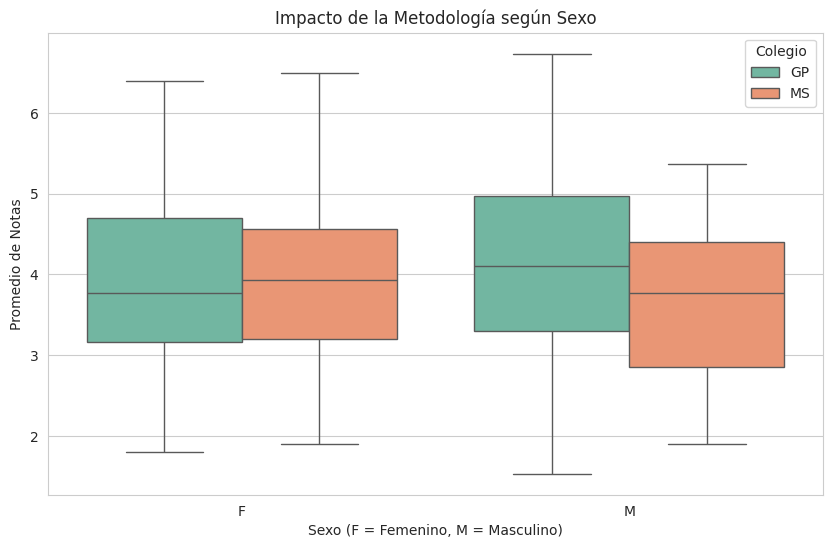


>>> Analizando Subgrupo: SEXO = F
   Muestras: n(GP)=160 vs n(MS)=22
   Promedios: GP=3.88 | MS=3.95
   P-Valor: 0.6168
   ❌ Resultado: No hay diferencia significativa.

>>> Analizando Subgrupo: SEXO = M
   Muestras: n(GP)=150 vs n(MS)=19
   Promedios: GP=4.16 | MS=3.66
   P-Valor: 0.0291
   ✅ HALLAZGO: ¡Diferencia significativa encontrada en este grupo!

--- TENDENCIAS POR EDAD ---


/tmp/ipython-input-3905191265.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='edad', y='Promedio', hue='colegio',


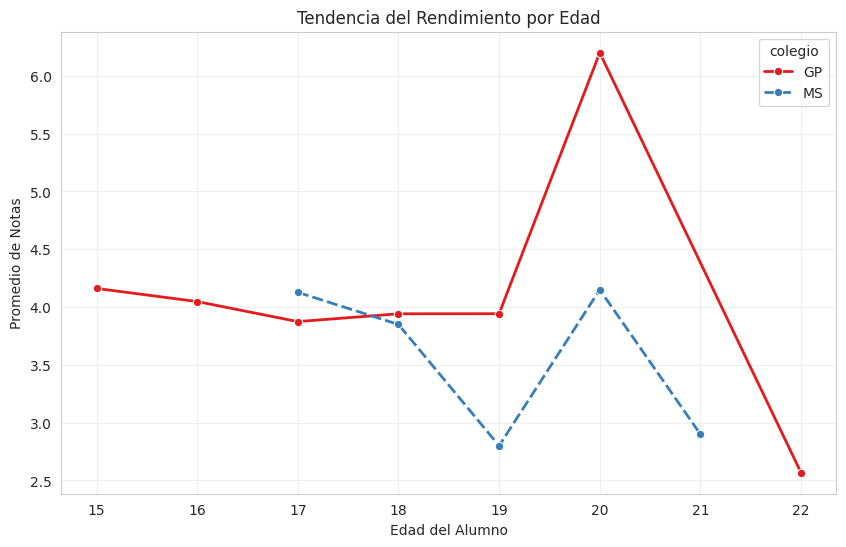

In [ ]:
# ==========================================
# FASE 5: ANÁLISIS DE SEGMENTACIÓN
# ==========================================
# Objetivo: Investigar si la metodología tiene efectos diferenciados
# según el sexo o la edad (Interacciones ocultas).

print("--- ANÁLISIS COMPARATIVO POR SEXO ---")

# A. Visualización de la Interacción (Colegio x Sexo)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sexo', y='Promedio', hue='colegio', palette='Set2')
plt.title('Impacto de la Metodología según Sexo')
plt.xlabel('Sexo (F = Femenino, M = Masculino)')
plt.ylabel('Promedio de Notas')
plt.legend(title='Colegio')
plt.show()

# B. Test Estadístico Estratificado (T-Test por Sexo)
sexos = df['sexo'].unique()

for s in sexos:
    print(f"\n>>> Analizando Subgrupo: SEXO = {s}")

    # Filtramos los datos para el sexo actual
    subset_gp = df[(df['colegio'] == 'GP') & (df['sexo'] == s)]['Promedio']
    subset_ms = df[(df['colegio'] == 'MS') & (df['sexo'] == s)]['Promedio']

    n_gp_sub = len(subset_gp)
    n_ms_sub = len(subset_ms)

    print(f"   Muestras: n(GP)={n_gp_sub} vs n(MS)={n_ms_sub}")
    print(f"   Promedios: GP={subset_gp.mean():.2f} | MS={subset_ms.mean():.2f}")

    # Validamos tamaño mínimo para test (n > 10 en el control)
    if n_ms_sub < 10:
        print("   ⚠️ ADVERTENCIA: Muestra insuficiente en grupo control para inferencia confiable.")
    else:
        # Test de una cola (GP > MS)
        # Asumimos varianzas iguales por parsimonia tras el análisis global
        t_stat, p_val = stats.ttest_ind(subset_gp, subset_ms, equal_var=True, alternative='greater')
        print(f"   P-Valor: {p_val:.4f}")

        if p_val < 0.05:
            print("   ✅ HALLAZGO: ¡Diferencia significativa encontrada en este grupo!")
        else:
            print("   ❌ Resultado: No hay diferencia significativa.")

# ==========================================
# Tendencias por Edad
# ==========================================
print("\n--- TENDENCIAS POR EDAD ---")
plt.figure(figsize=(10, 6))
# Usamos lineplot para ver la evolución. ci=None quita el sombreado para limpiar la vista.
sns.lineplot(data=df, x='edad', y='Promedio', hue='colegio',
             marker='o', style='colegio', ci=None, palette='Set1', linewidth=2)
plt.title('Tendencia del Rendimiento por Edad')
plt.xlabel('Edad del Alumno')
plt.ylabel('Promedio de Notas')
plt.grid(True, alpha=0.3)
plt.show()



---



---



# Conclusiones y Recomendaciones Estratégicas

##  Resumen Ejecutivo del Estudio
El análisis riguroso de los datos, tras un proceso de limpieza forense (eliminación de duplicados y registros incompletos) y validación estadística, permite concluir que la nueva metodología educativa implementada en el colegio **Graham Parker (GP)** tiene un impacto **complejo y diferenciado**. No existe una mejora "universal", sino una mejora "focalizada".

##  Validación de la Robustez del Estudio
Antes de emitir el juicio final, se validaron condiciones críticas para asegurar la calidad de la inferencia:
*   **Integridad de los Datos:** Se depuró la base de datos eliminando sesgos negativos artificiales (alumnos con nota 0.0 por deserción), recuperando el promedio real del colegio GP.
*   **Balance Demográfico:** El Test de **Chi-Cuadrado** confirmó ($p=0.93$) que la proporción de hombres y mujeres es idéntica en ambos colegios. Esto valida que los resultados por género **no están sesgados** por una sobrerrepresentación de un grupo.
*   **Factores Externos:** El análisis de correlación detectó que las **ausencias** tienen un impacto negativo leve ($r=-0.18$) en el rendimiento, un factor a monitorear en el futuro.

##  El Hallazgo Crítico: Impacto Diferenciado por Sexo
Si bien el análisis global (T-Test y Bootstrapping) **no mostró una mejora significativa general** ($p > 0.05$), la segmentación reveló el verdadero valor de la intervención:

1.  **En Mujeres (F):** La metodología es **neutral**. Los promedios son estadísticamente equivalentes a la metodología tradicional ($p=0.61$).
2.  **En Hombres (M):** La nueva metodología **SÍ genera una mejora significativa** ($p=0.029$), elevando el promedio en **0.50 puntos** (de 3.66 a 4.16).

##  Recomendaciones para el Ministerio
Basado en la evidencia, se sugiere la siguiente hoja de ruta:

1.  **Implementación Focalizada:** Expandir la metodología prioritariamente en cursos con mayoría masculina o adaptar su despliegue para capitalizar este incremento de 0.5 puntos en dicho segmento.
2.  **Investigación Pedagógica Urgente:** Investigar cualitativamente **qué componentes** de la metodología (ej. gamificación, competencia, trabajo individual) no están resonando con las alumnas mujeres para ajustar el programa y hacerlo inclusivo.
3.  **Política de Asistencia:** Dado la correlación negativa detectada, reforzar programas de asistencia escolar en el colegio GP podría potenciar aún más los efectos positivos de la metodología.
4.  **Continuidad del Piloto:** **No cancelar el programa.** Los resultados en el segmento masculino justifican plenamente su continuación y optimización.